<a href="https://colab.research.google.com/github/mieramensatu/Data-mining/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('student_performance_prediction.csv')
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [8]:
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [17]:
df.shape

(40000, 7)

In [9]:
df.isnull().sum()

,0
Student ID,0
Study Hours per Week,1995
Attendance Rate,1992
Previous Grades,1994
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


In [15]:
df.columns

Index(['Student ID', 'Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed'],
      dtype='object')

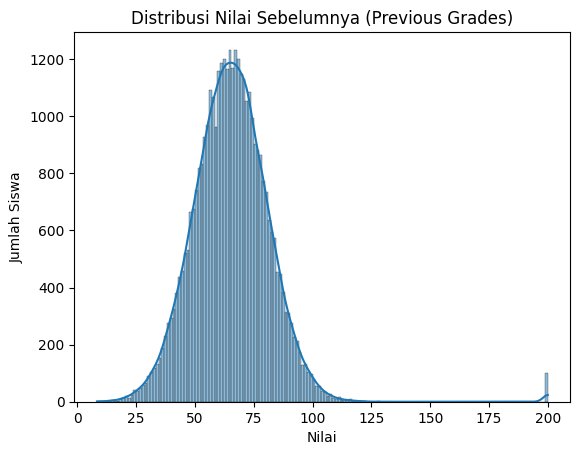

In [16]:
sns.histplot(df['Previous Grades'], kde=True)
plt.title('Distribusi Nilai Sebelumnya (Previous Grades)')
plt.xlabel('Nilai')
plt.ylabel('Jumlah Siswa')
plt.show()

In [18]:
def categorize(score):
  if score >= 80:
    return 'High'
  elif score >= 60:
    return 'Medium'
  else:
    return 'Low'

In [19]:
df['performance'] = df['Previous Grades'].apply(categorize)
df['performance'].value_counts()

,count
performance,
Medium,18030
Low,15809
High,6161


In [20]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [22]:
df.columns

Index(['student_id', 'study_hours_per_week', 'attendance_rate',
       'previous_grades', 'participation_in_extracurricular_activities',
       'parent_education_level', 'passed', 'performance'],
      dtype='object')

In [23]:
num_cols = ['study_hours_per_week', 'attendance_rate', 'previous_grades']
for col in num_cols:
  df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-23-3676676016.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [26]:
cat_cols = ['participation_in_extracurricular_activities', 'parent_education_level', 'passed']
for col in cat_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-26-3899735159.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [27]:
df.isnull().sum()

,0
student_id,0
study_hours_per_week,0
attendance_rate,0
previous_grades,0
participation_in_extracurricular_activities,0
parent_education_level,0
passed,0
performance,0


In [28]:
df.columns

Index(['student_id', 'study_hours_per_week', 'attendance_rate',
       'previous_grades', 'participation_in_extracurricular_activities',
       'parent_education_level', 'passed', 'performance'],
      dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['participation_in_extracurricular_activities'] = le.fit_transform(df['participation_in_extracurricular_activities'])
df['parent_education_level'] = le.fit_transform(df['parent_education_level'])
df['passed'] = le.fit_transform(df['passed'])

In [30]:
x = df[['study_hours_per_week', 'attendance_rate', 'previous_grades', 'participation_in_extracurricular_activities', 'parent_education_level']]
y = df['passed']

In [31]:
x

,study_hours_per_week,attendance_rate,previous_grades,participation_in_extracurricular_activities,parent_education_level
0,12.5,75.3,75.0,1,4
1,9.3,95.3,60.6,0,3
2,13.2,75.3,64.0,0,0
3,17.6,76.8,62.4,1,1
4,8.8,89.3,72.7,0,4
...,...,...,...,...,...
39995,15.6,93.8,51.4,1,4
39996,11.3,66.4,64.2,0,2
39997,13.1,65.6,38.1,0,1
39998,14.1,74.9,65.2,1,4


In [32]:
y

,passed
0,1
1,0
2,0
3,0
4,0
...,...
39995,0
39996,1
39997,0
39998,0


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test)
print("classification report:")
print(classification_report(y_test, y_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

classification report:
              precision    recall  f1-score   support

           0       0.48      0.46      0.47      3794
           1       0.53      0.54      0.53      4206

    accuracy                           0.50      8000
   macro avg       0.50      0.50      0.50      8000
weighted avg       0.50      0.50      0.50      8000

confusion matrix:
[[1762 2032]
 [1933 2273]]


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
importances = model.feature_importances_
features = x.columns

In [42]:
feat_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='importance', ascending=False)

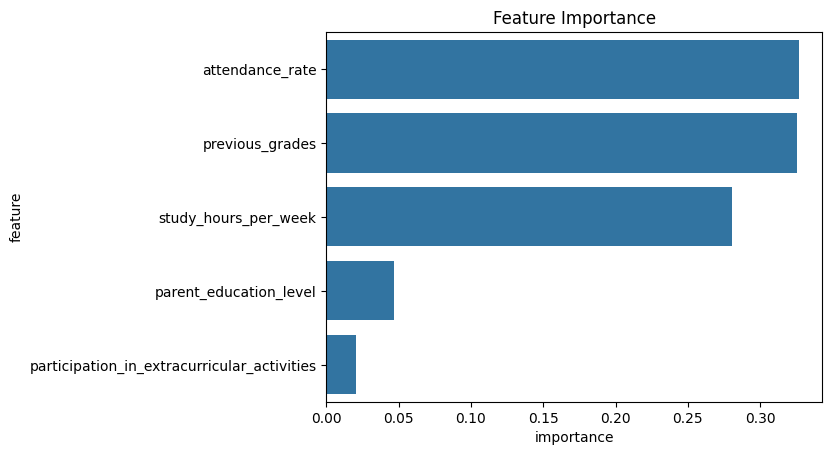

In [43]:
sns.barplot(x='importance', y='feature', data=feat_importance_df)
plt.title('Feature Importance')
plt.show()